## Analyzing Football Fans ahead of Euro 2024
![adidas_euro2024](adidas_euro2024.png)


The datasets for this project are available in the following CSVs:

1. `"ConsTable_EU.csv"`: table consisting of consumer information
2. `"SalesTable_EU.csv"`: table consisting of sales of different products
3. `"EngagementTable_GB.csv"`: table consisting of touchpoints at which football fans in GB engaged in 2022

### Loading and exploring the data

Let's load the datasets and perform some initial exploratory data analysis.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_columns', 20)

# Load the datasets into the DataFrames `cons_eu`, `sales_eu`, and `engagement_db`
cons_eu=pd.read_csv("ConsTable_EU.csv")
sales_eu=pd.read_csv("SalesTable_EU.csv")
engagement_db=pd.read_csv("EngagementTable_GB.csv")


print(cons_eu.head())
print(sales_eu.head())
print(engagement_db.head())

               acid  ... member_latest_points
0  T1P58V1YFN8FXD0K  ...               2400.0
1  H24SNEP4HNBA6KVC  ...                  NaN
2  OUU8CGXKA9WIL7LW  ...                  NaN
3  P3MU0M8Z1IJ0ZL6B  ...                  0.0
4  LTZVC7YMPXJGLKOW  ...                  0.0

[5 rows x 8 columns]
               acid  ... order_item_unit_price_net
0  ZLGJWX6NZSAZO8WG  ...                 10.740000
1  LE9L3EOB8US4OCNM  ...                 12.537143
2  G7B6URALVYUY3WBY  ...                 48.350000
3  L495Y9NQSFL4YS27  ...                 25.320000
4  80FLPI7RRZETFPSA  ...                 50.360000

[5 rows x 20 columns]
               acid country  year  ...  freq_preference  freq_wishlist  refresh_date
0  W884Q2CXMZIUPJAY      GB  2022  ...                0              0    2024-03-04
1  SK35CN4PN3D8BSQ5      GB  2022  ...                0              0    2024-03-04
2  PEFUFIL9L91LWRCH      GB  2022  ...                0              0    2024-03-04
3  L3C6LK6TNPV7TU4T      GB  2022

Let's now explore the structure of the data to understand:

- What is the shape of the data?
- What are the data types of different columns?

In [128]:
# Explore the shape of the data and summarize the data types

print('cons_eu structure',cons_eu.shape,'\n',cons_eu.dtypes,'\n')
print('sales_eu structure',sales_eu.shape,'\n',sales_eu.dtypes,'\n')
print('engagement_db structure',engagement_db.shape,'\n',engagement_db.dtypes)



cons_eu structure (355461, 8) 
 acid                          object
loyalty_memberid              object
birth_year                   float64
consumer_gender               object
market_name                   object
first_signup_country_code     object
member_latest_tier            object
member_latest_points         float64
dtype: object 

sales_eu structure (178334, 20) 
 acid                          object
order_no                      object
order_date                    object
market_name                   object
country                       object
article_no                    object
key_category_descr            object
sports_category_descr         object
product_division              object
product_type                  object
product_age_group             object
product_gender                object
quantity_ordered               int64
quantity_returned              int64
quantity_cancelled             int64
quantity_delivered             int64
no_of_items_after_returns     

Let's check for null values before continuing our analysis.

In [129]:
# Check for null values in the data

print(cons_eu.isnull().sum(),'\n')
print(sales_eu.isnull().sum(),'\n')
print(engagement_db.isnull().sum(),'\n')


acid                              0
loyalty_memberid              89011
birth_year                   221819
consumer_gender                   0
market_name                       0
first_signup_country_code         0
member_latest_tier            89126
member_latest_points          89126
dtype: int64 

acid                           0
order_no                       0
order_date                     0
market_name                    0
country                        0
article_no                     0
key_category_descr             0
sports_category_descr          0
product_division               0
product_type                   0
product_age_group              0
product_gender                 0
quantity_ordered               0
quantity_returned              0
quantity_cancelled             0
quantity_delivered             0
no_of_items_after_returns      0
currency                       0
exchange_rate_to_EUR           0
order_item_unit_price_net    124
dtype: int64 

acid                  

### Treating null values


As we see a very small number of `order_item_unit_price_net` has null values, let's replace these null values with the median of `order_item_unit_price_net`.

In [130]:
# Replace null values in order_item_unit_price_net of the sales table with the median

sales_eu['order_item_unit_price_net'].fillna(sales_eu['order_item_unit_price_net'].median(),inplace=True)
print(sales_eu.isnull().sum(),'\n')



acid                         0
order_no                     0
order_date                   0
market_name                  0
country                      0
article_no                   0
key_category_descr           0
sports_category_descr        0
product_division             0
product_type                 0
product_age_group            0
product_gender               0
quantity_ordered             0
quantity_returned            0
quantity_cancelled           0
quantity_delivered           0
no_of_items_after_returns    0
currency                     0
exchange_rate_to_EUR         0
order_item_unit_price_net    0
dtype: int64 



Since loyalty member details are unique to each user, we cannot replace it with any other value. So there is no null value treatment for `loyalty_memberid`.

Let's now replace missing values in the ConsTable.

In [131]:
# Replace missing values in birth_year with the median
cons_eu['birth_year'].fillna(cons_eu['birth_year'].median(),inplace=True)

# Replace missing values in member_latest_tier with the mode
cons_eu['member_latest_tier'].fillna(cons_eu['member_latest_tier'].mode(),inplace=True)

# Replace missing values in member_latest_points with the median
cons_eu['member_latest_points'].fillna(cons_eu['member_latest_points'].median(),inplace=True)

print(cons_eu.isnull().sum(),'\n')



acid                             0
loyalty_memberid             89011
birth_year                       0
consumer_gender                  0
market_name                      0
first_signup_country_code        0
member_latest_tier           89126
member_latest_points             0
dtype: int64 



### Visual EDA (Exploratory Data Analysis)

Let's now do some visual EDA.


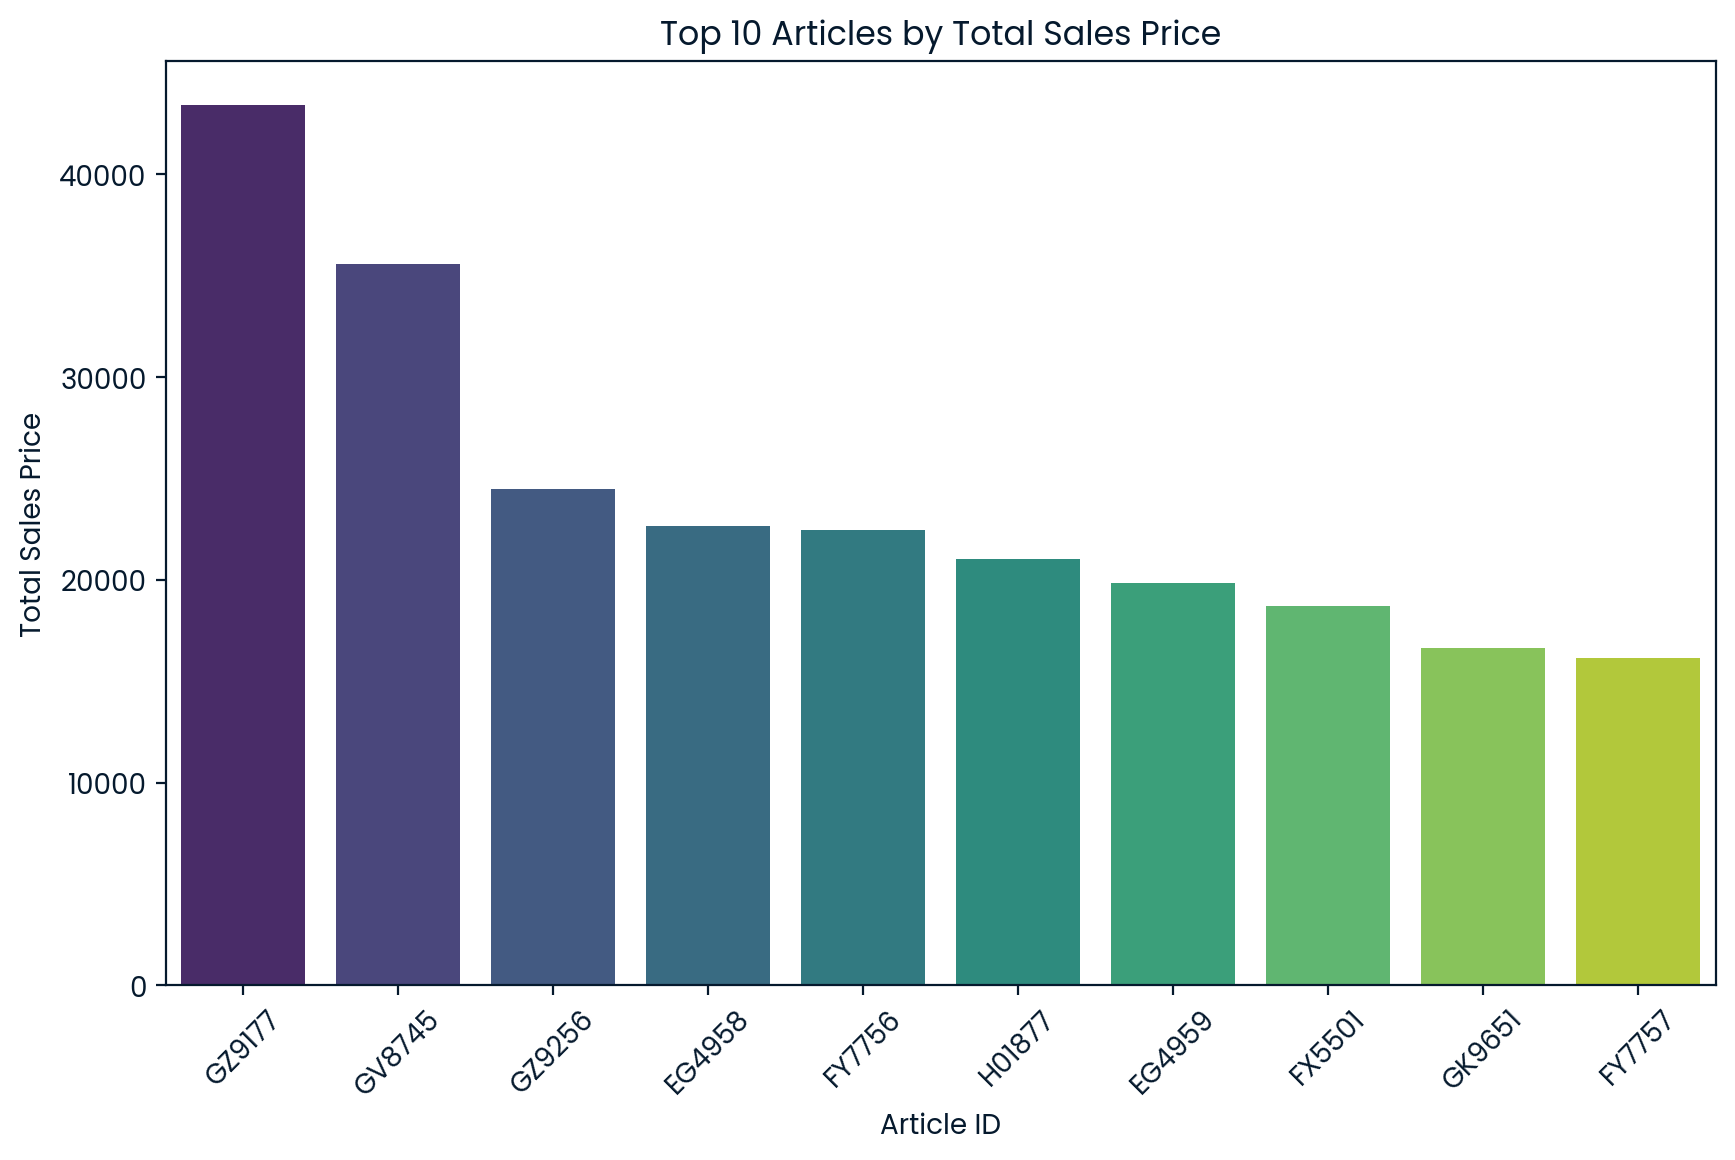

In [132]:
# Group the sales table by article_no
# Store the result in a variable called grouped_sales_eu

grouped_sales_eu=sales_eu.groupby('article_no')


# Calculate the top 10 articles by total sales price: top_10_articles

top_10_articles=grouped_sales_eu['order_item_unit_price_net'].sum().sort_values(ascending=False)[:10]


# Plot the top 10 articles by total sales price

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_articles.index, y=top_10_articles.values, palette='viridis')
plt.xlabel('Article ID')
plt.ylabel('Total Sales Price')
plt.title('Top 10 Articles by Total Sales Price')
plt.xticks(rotation=45)
plt.show()



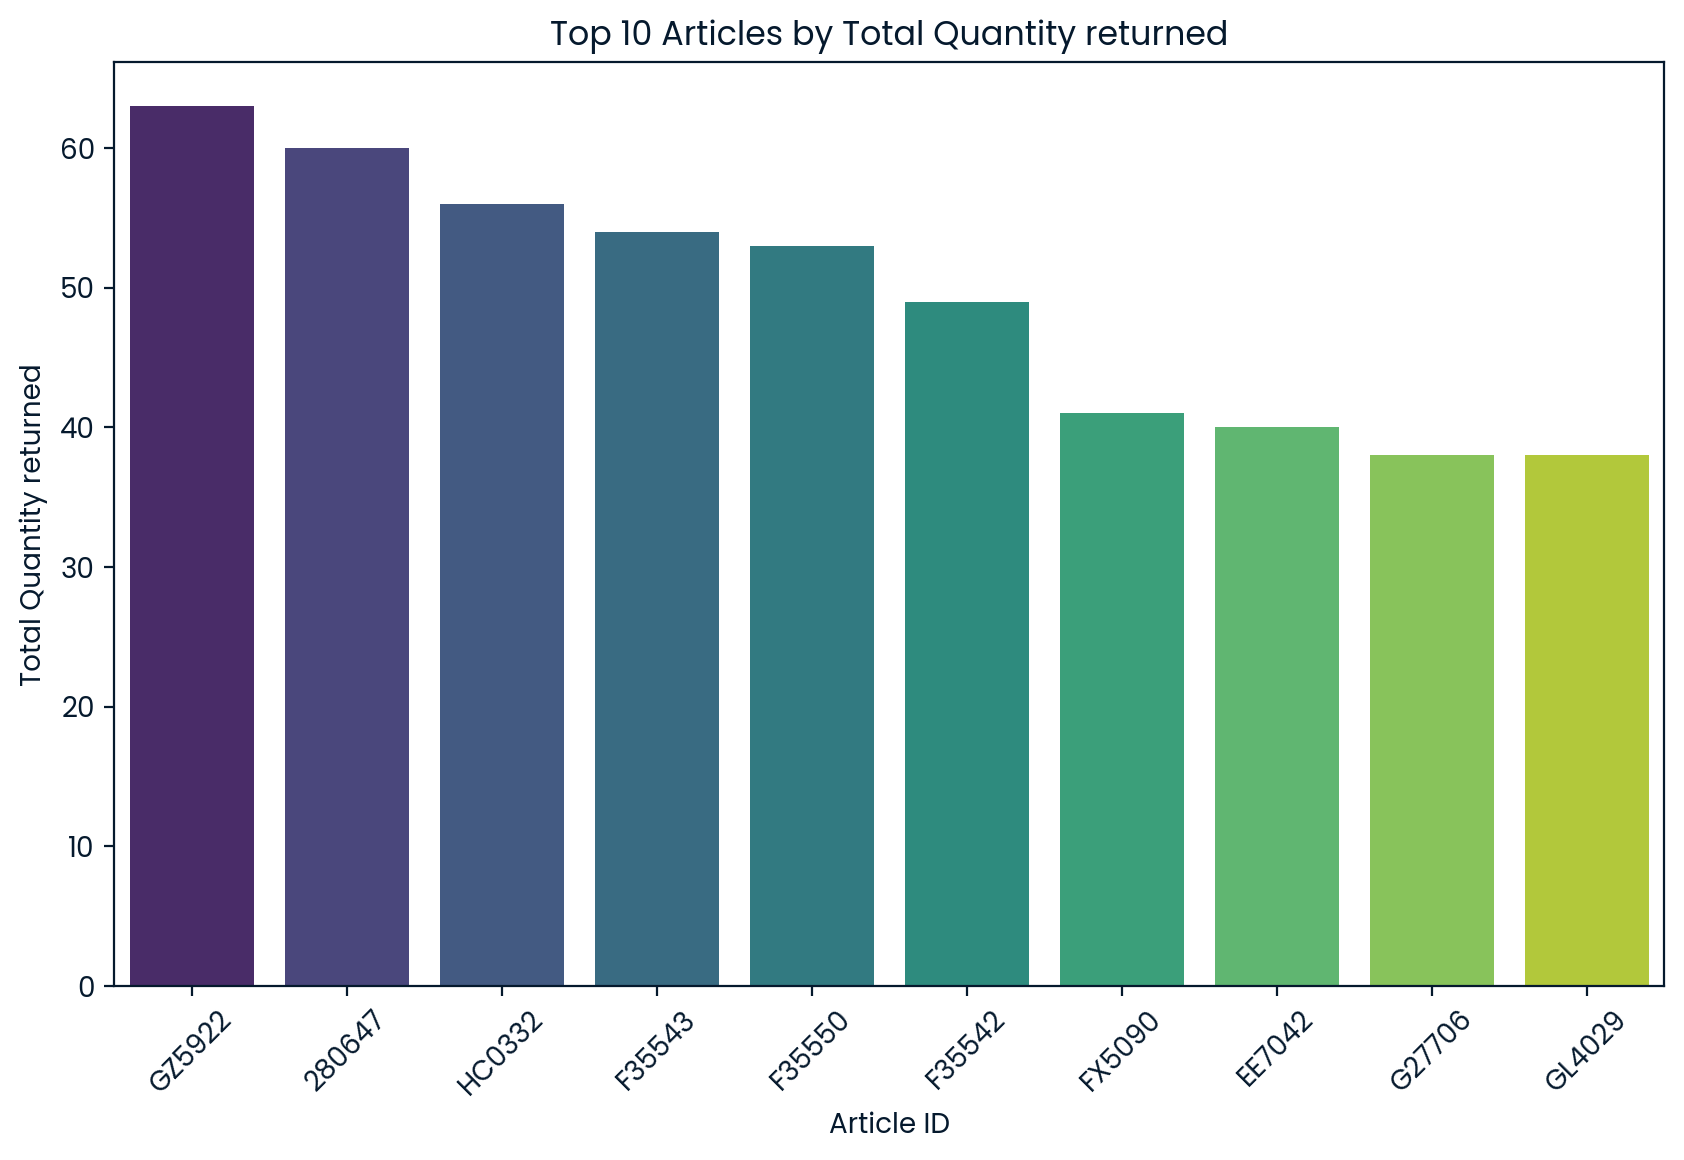

In [133]:
# Calculate the top 10 articles by total quantity returned: top_10_article_returns

group_return_sales_eu=sales_eu.groupby('article_no')



top_10_article_returns=grouped_sales_eu['quantity_returned'].sum().sort_values(ascending=False)[:10]



# Plot the top 10 articles by quantity_returned

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_article_returns.index, y=top_10_article_returns.values, palette='viridis')
plt.xlabel('Article ID')
plt.ylabel('Total Quantity returned')
plt.title('Top 10 Articles by Total Quantity returned')
plt.xticks(rotation=45)
plt.show()



## Discovering Football Fans in the Data

Let's now use SQL to segment customers into football fans and general consumers, exploring the differences between them.

How do football fans differ from our total consumers in terms of characteristics and demographics?


In [134]:
-- Group football fans

-- Identify football fans from SalesTable_EU.csv
CREATE TABLE FootballFans AS
SELECT DISTINCT acid
FROM sales_eu
WHERE sports_category_descr = 'FOOTBALL/SOCCER';

CREATE TABLE GeneralConsumers AS
SELECT DISTINCT acid
FROM sales_eu
WHERE sports_category_descr != 'FOOTBALL/SOCCER';



-- Merge football fans with ConsTable_EU.csv to get demographic details
CREATE TABLE FootballFansDetails AS
SELECT acid, birth_year, consumer_gender, first_signup_country_code, cast(YEAR(CURrent_DATE()) - birth_year as int) AS age
FROM cons_eu
WHERE acid IN (SELECT acid FROM FootballFans);

CREATE TABLE GeneralConsumersDetails AS
SELECT acid, birth_year, consumer_gender, first_signup_country_code, cast(YEAR(CURrent_DATE()) - birth_year as int) AS age
FROM cons_eu 
WHERE acid IN (SELECT acid FROM GeneralConsumers);


,Count
0,1143


In [ ]:
-- Select and count the number of people in different age brackets for Football Fans
SELECT
    'Football Fans' AS Segment,  
    sum(case when age<=18 then 1 else 0 end) as '0-18',  
    sum(case when age>18 and age<=25 then 1 else 0 end) as '18-25',  
    sum(case when age>25 and age<=35 then 1 else 0 end) as '25-35',  
    sum(case when age>35 and age<=45 then 1 else 0 end) as '35-45',  
    sum(case when age>45 and age<=55 then 1 else 0 end) as '45-55',  
    sum(case when age>55 then 1 else 0 end) as '55+' 
FROM FootballFansDetails  

UNION ALL  -- Combine results with the following query, including all records

-- Select and count the number of people in different age brackets for General Consumers
SELECT
    'General Consumers' AS Segment, 
    sum(case when age<=18 then 1 else 0 end) as '0-18',  
    sum(case when age>18 and age<=25 then 1 else 0 end) as '18-25',  
    sum(case when age>25 and age<=35 then 1 else 0 end) as '25-35', 
    sum(case when age>35 and age<=45 then 1 else 0 end) as '35-45',  
    sum(case when age>45 and age<=55 then 1 else 0 end) as '45-55',  
    sum(case when age>55 then 1 else 0 end) as '55+' 
FROM GeneralConsumersDetails  


In [ ]:
-- Query to count the number of football fans by gender
SELECT
    'Football Fans' AS Segment,  
    consumer_gender,  
    count(consumer_gender) AS GenderCount  
FROM FootballFansDetails  
GROUP BY consumer_gender  -- Group results by gender

UNION ALL  -- Combine results with the following query, including all records

-- Query to count the number of general consumers by gender
SELECT
    'General Consumers' AS Segment,  
    consumer_gender,  
    count(consumer_gender) AS GenderCount  
FROM GeneralConsumersDetails  
GROUP BY consumer_gender  -- Group results by gender


In [ ]:

SELECT
    'Football Fans' AS Segment,first_signup_country_code, count(first_signup_country_code)
FROM FootballFansDetails
group by first_signup_country_code
UNION ALL
SELECT
    'General Consumers' AS Segment,first_signup_country_code, count(first_signup_country_code)
FROM GeneralConsumersDetails
group by first_signup_country_code

##  Analyzing Sales Data for Football Fans

Let's now delve into the sales data focusing on purchases made by football fans.

- How much Net Sales were generated by Football Fans in 2022 in the football category?
    - The column of interest here is `"order_item_unit_price_net"`.
- What were the top 5 product types in Germany?

In [135]:
# Convert year to the appropriate data type
sales_eu['year']=pd.to_datetime(sales_eu['order_date']).dt.year
# How much Net Sales was generated by Football Fans in 2022 in the football category?
sales_eu_orderdate_grouped=sales_eu.groupby('year')
print(sales_eu['order_item_unit_price_net'][(sales_eu['country']=='GR') & (sales_eu['year']==2022)].sum())

117443.03033333333


#### What are the Top 5 product types in Germany?

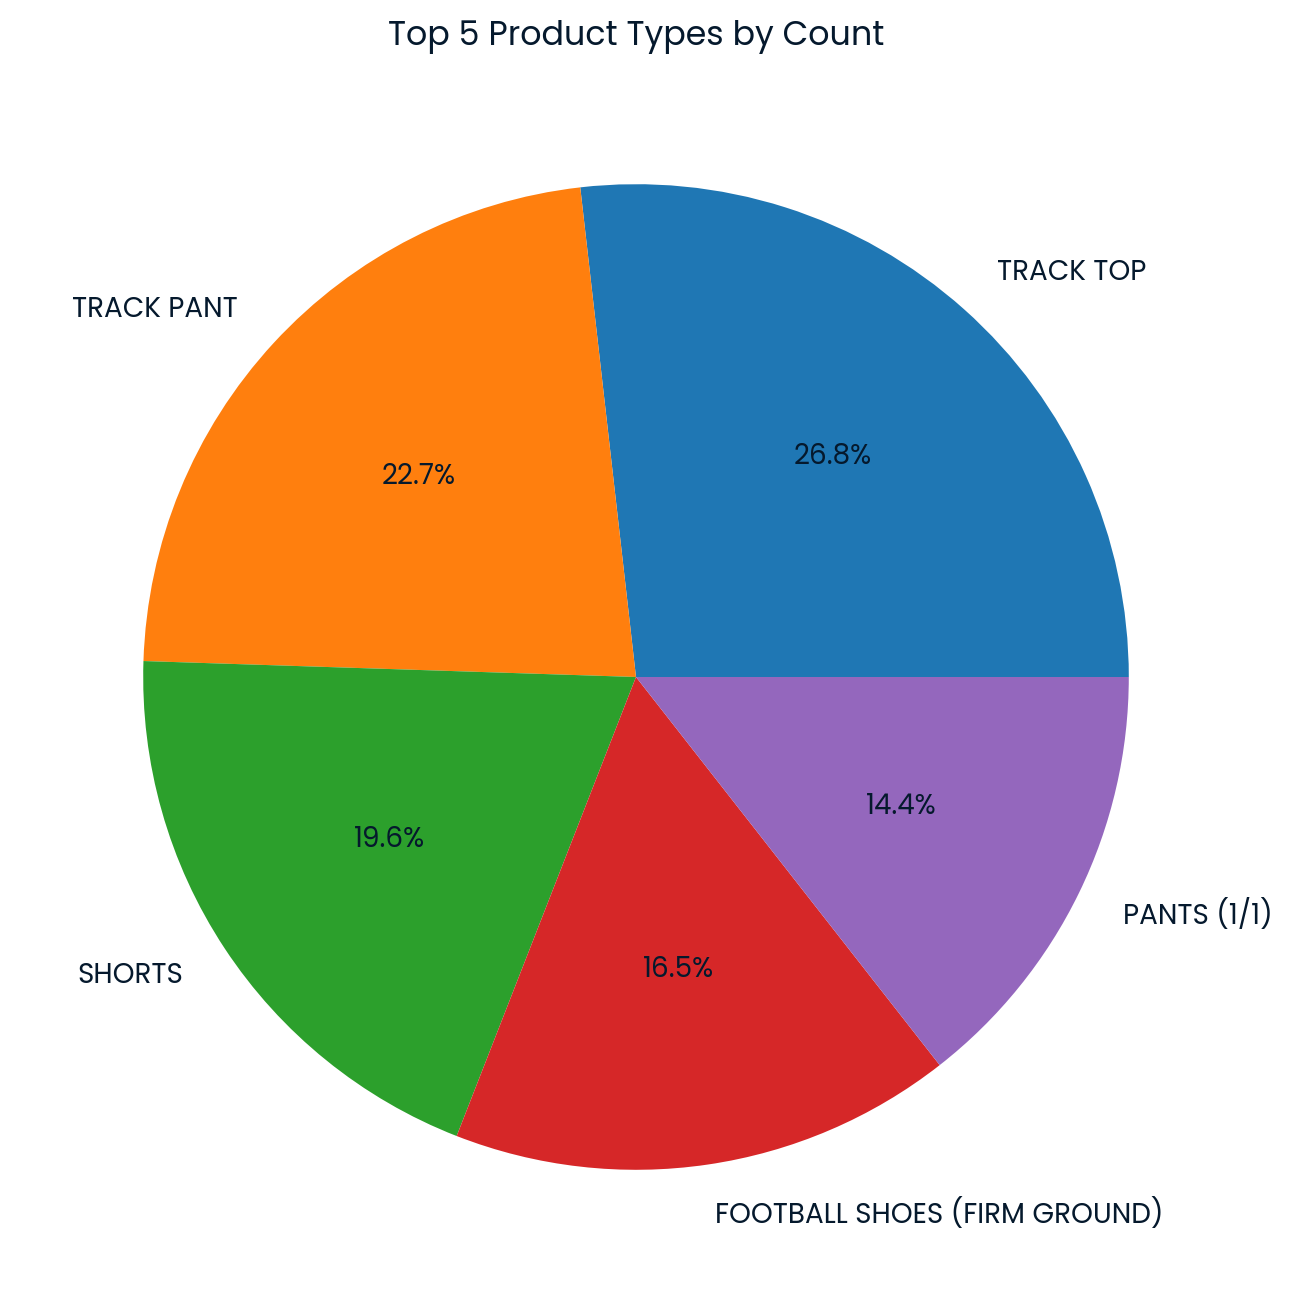

In [136]:


sales_de_football=sales_eu[(sales_eu['country']=='GR') & (sales_eu['sports_category_descr']=='FOOTBALL/SOCCER')]

# Grouped by German football fans by product_type into a variable called grouped_sales_de
grouped_sales_de = sales_de_football.groupby('product_type').size()

# Visualize the top 5 product types
top_5_product_de = grouped_sales_de.sort_values(ascending=False).head(5)

# Plotting
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(8, 8))
plt.pie(top_5_product_de.values, labels=top_5_product_de.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 5 Product Types by Count')
plt.show()


## Broadening the playing field - interests beyond football

Let's now identify which other product categories catch the attention of football fans. Let's also explore purchasing behavior outside of Germany, such as in Spain.

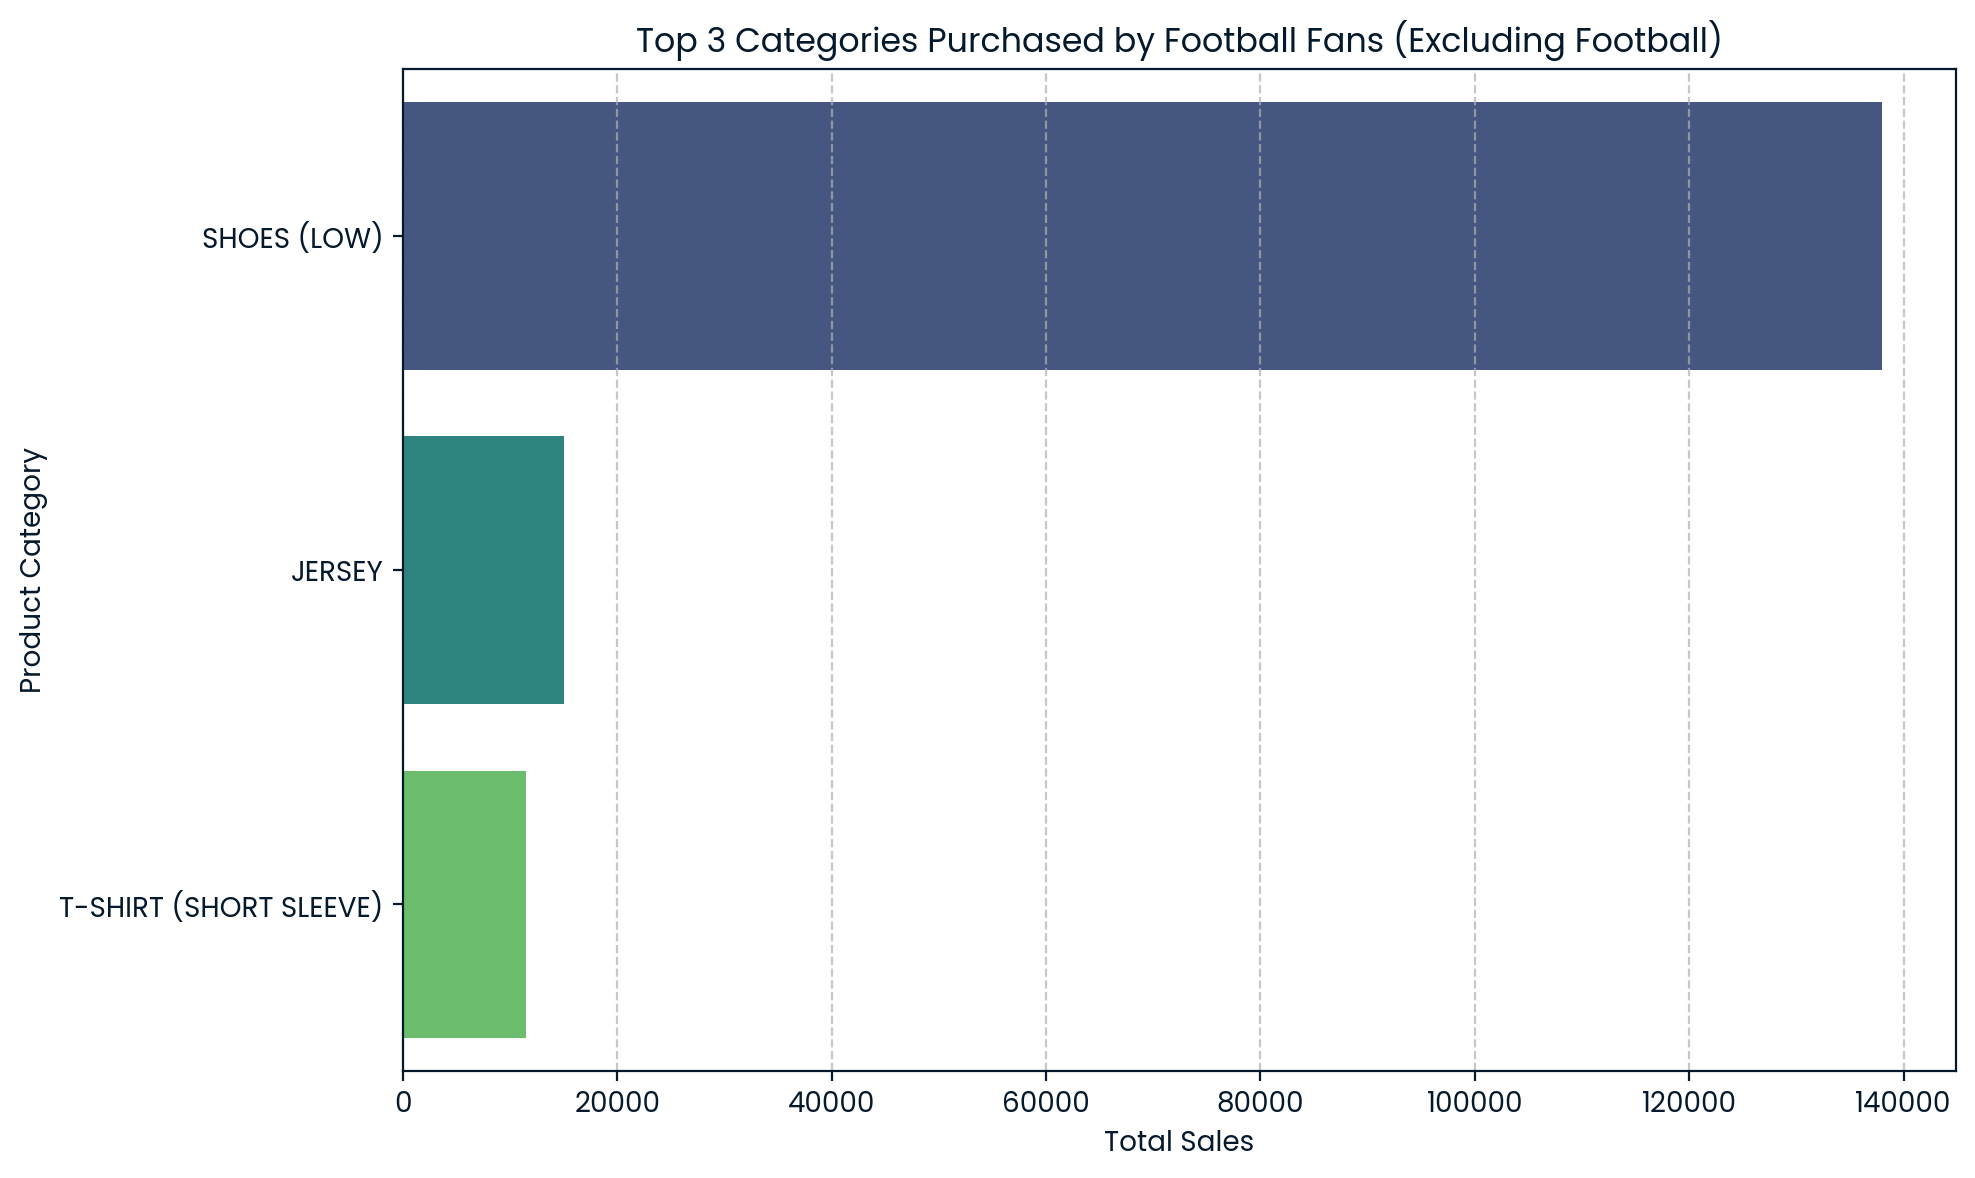

In [137]:
# Add a "Price" column to sales_eu containing the product of "no_of_items_after_returns" and "order_item_unit_price_net"
sales_eu['Price'] = sales_eu['no_of_items_after_returns'] * sales_eu['order_item_unit_price_net']


# Filter for Spain ("ES")

sales_eu_spain = sales_eu[sales_eu['country'] == 'ES']

# Calculate the top 3 product categories in Spain

category_sales = sales_eu_spain.groupby('product_type')['Price'].sum()

# Sort by total sales in descending order and get the top 3 categories
top_3_categories = category_sales.sort_values(ascending=False).head(3)

# Plot the top 3 categories that football fans purchased outside of the football category


plt.figure(figsize=(10, 6))
sns.barplot(y=top_3_categories.index, x=top_3_categories.values, palette='viridis')

plt.title('Top 3 Categories Purchased by Football Fans (Excluding Football)')
plt.ylabel('Product Category')
plt.xlabel('Total Sales')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Grid lines on x-axis

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()




## Exploring sales in other sports

Let's now use a bar chart to visualize country wise sales for Sports Category


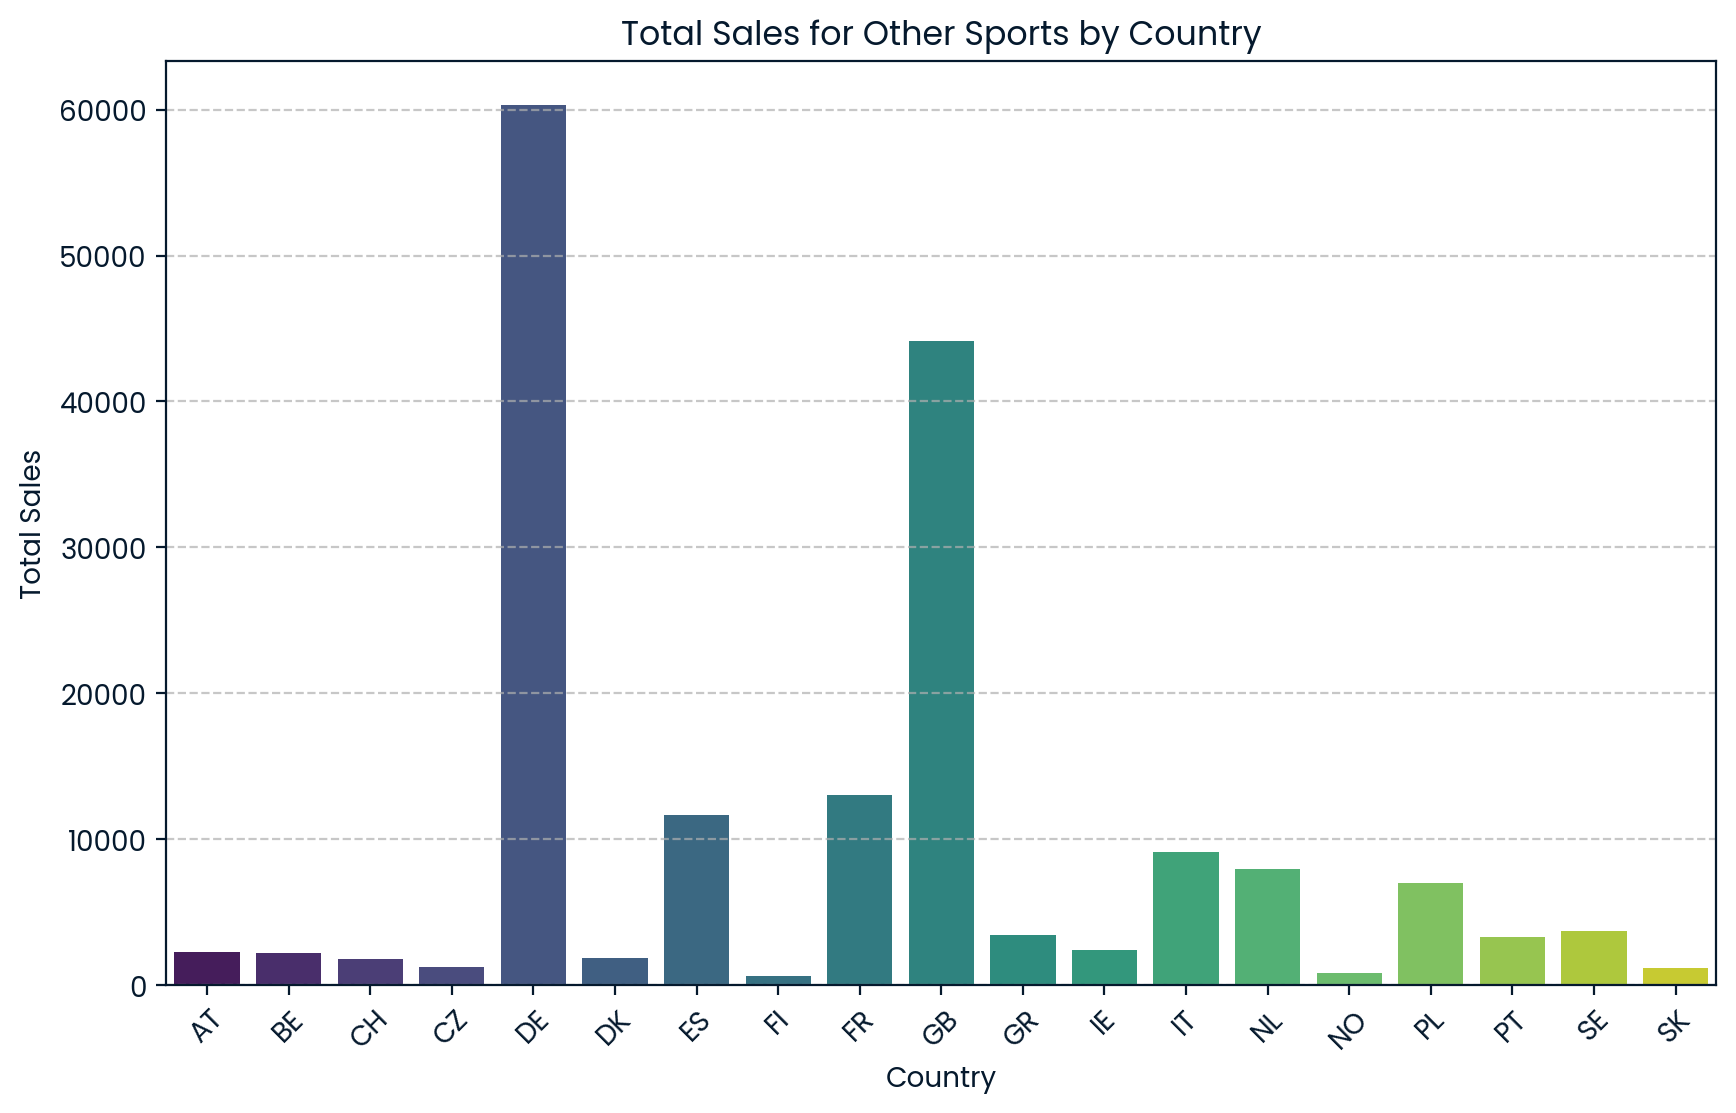

In [138]:
# Create a variable sales_eu_othersports containing sales in other sports

sales_eu_othersports=sales_eu[(sales_eu['sports_category_descr'] != 'Football')]

# Group by country and visualize

country_sales = sales_eu_othersports.groupby('country').size()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='viridis')

plt.title('Total Sales for Other Sports by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


## Bringing Data to Life with Visualization

Just as a highlight reel showcases the most exciting and crucial moments of a game, bringing data to life with visualization captures and highlights the most important insights and trends from your data! 

Let's bring some of the data to life by creating visualizations for:

- Daily ordered quantity (`quantity_ordered`) in November
- Quantity Returned (`quantity_returned`) in each product division
- Total sales in each product division (`product_division`)

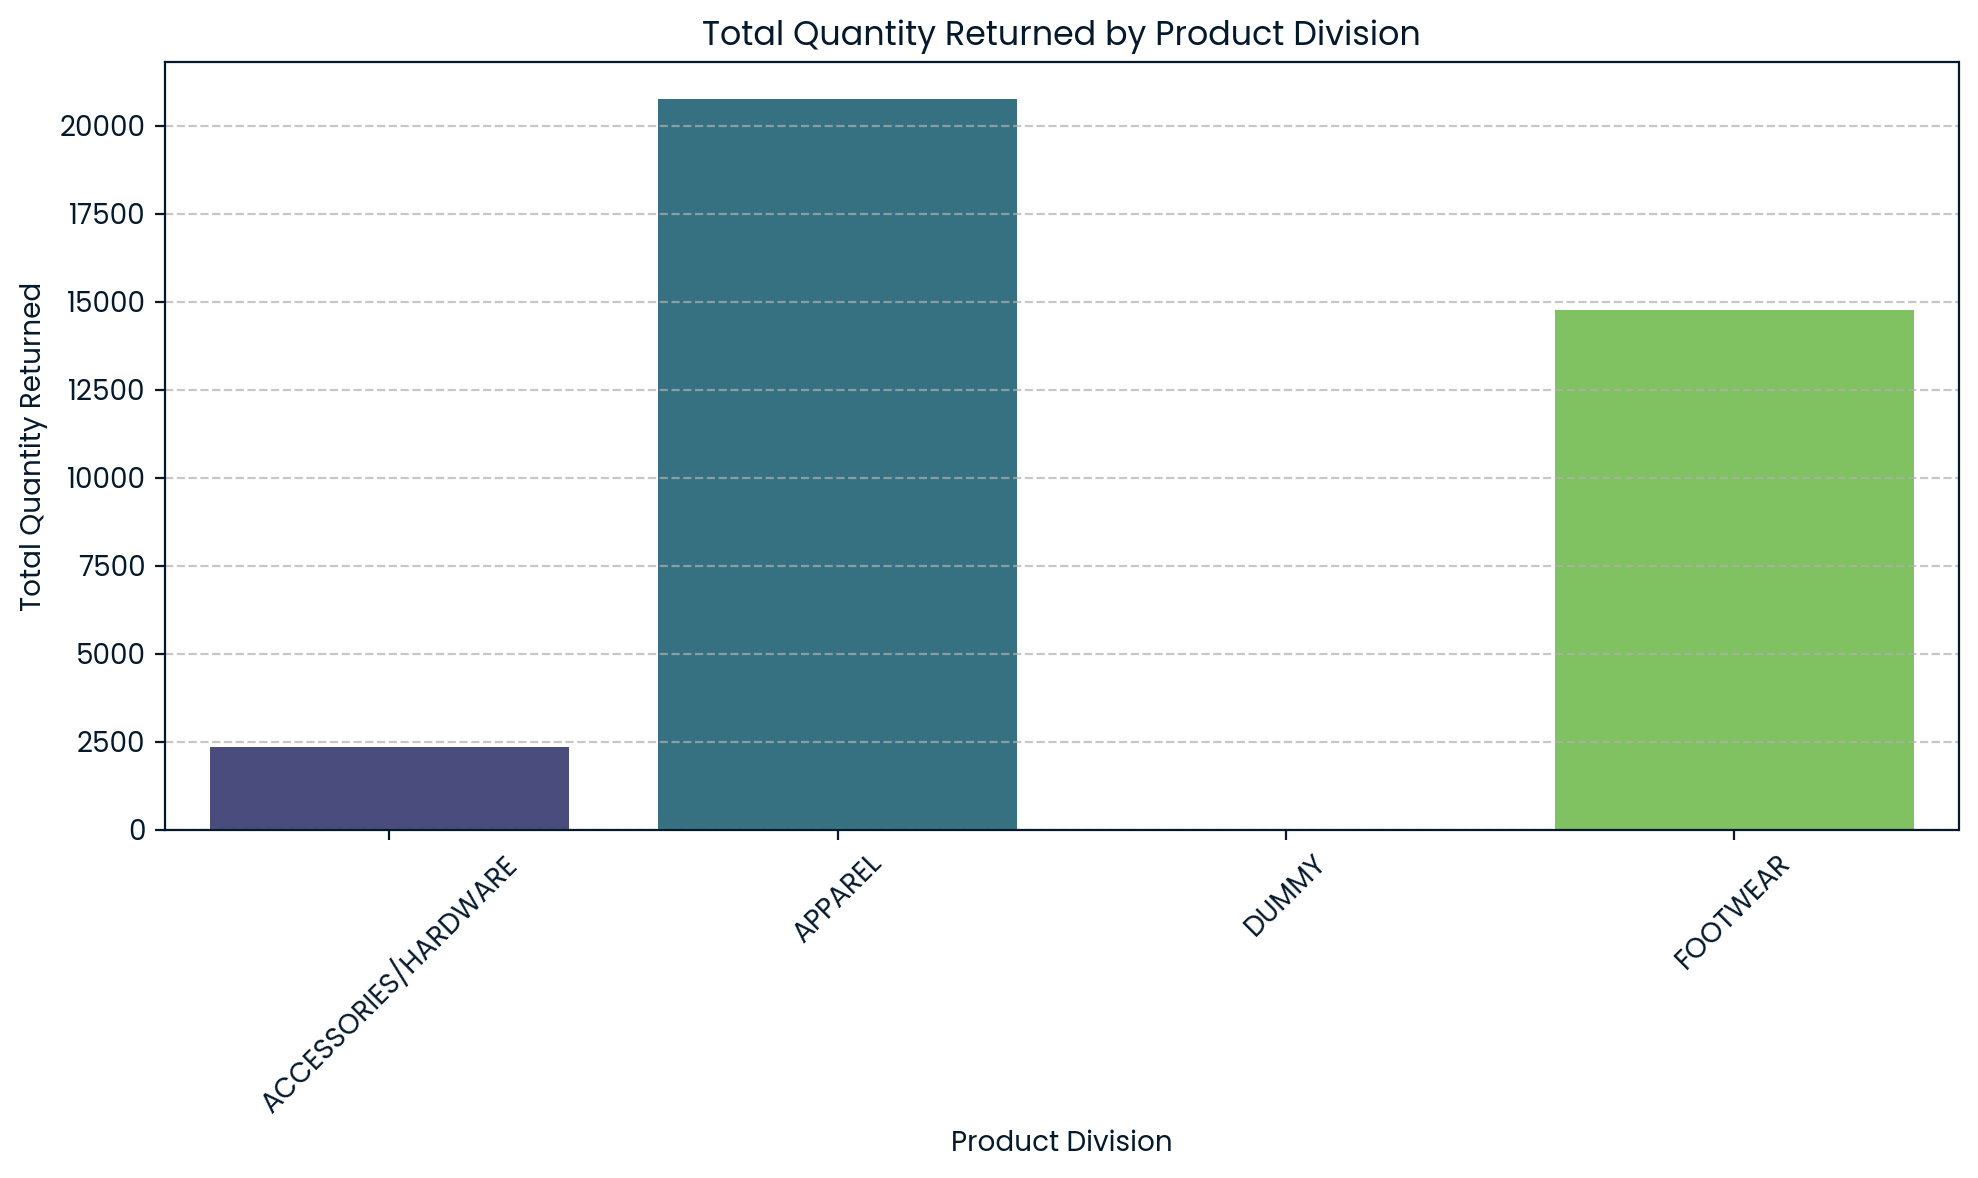

In [3]:
# Visualize quantity Returned (`quantity_returned`) in each product division
# Store your groupby object in a variable called `sales_eu_productdivision_grouped`

sales_eu_productdivision_grouped = sales_eu.groupby('product_division')['quantity_returned'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_eu_productdivision_grouped.index, y=sales_eu_productdivision_grouped.values, palette='viridis')

plt.title('Total Quantity Returned by Product Division')
plt.xlabel('Product Division')
plt.ylabel('Total Quantity Returned')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()
